## Importing some libraries

In [126]:
import matplotlib.pyplot as plt
from pandas import Series, DataFrame, Panel
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [127]:
# Loading the file
data = pd.read_csv('motorPower.csv')
data.head()

,100,213.8,2.96,1,2017-03-31 18:30:07,2017-03-31 18:30:07.1
0,101,213.8,2.96,1.0,2017-03-31 18:30:07,2017-03-31 18:30:07
1,102,213.8,2.96,1.0,2017-03-31 18:30:07,2017-03-31 18:30:07
2,103,213.8,2.96,1.0,2017-03-31 18:30:07,2017-03-31 18:30:07
3,104,213.8,2.96,1.0,2017-03-31 18:30:07,2017-03-31 18:30:07
4,105,213.8,2.96,1.0,2017-03-31 18:30:07,2017-03-31 18:30:07


As you can see, this dont have columns names, so we busto to drop some columns and put names to it.

In [128]:
df = data
df = df.drop(['100','2017-03-31 18:30:07.1'], 1)
df.columns =['volt','current','cos','date']
df.head()

,volt,current,cos,date
0,213.8,2.96,1.0,2017-03-31 18:30:07
1,213.8,2.96,1.0,2017-03-31 18:30:07
2,213.8,2.96,1.0,2017-03-31 18:30:07
3,213.8,2.96,1.0,2017-03-31 18:30:07
4,213.8,2.96,1.0,2017-03-31 18:30:07


# Current's Analysis

##### Ploting the currents data over the num of data that we collect all this time.

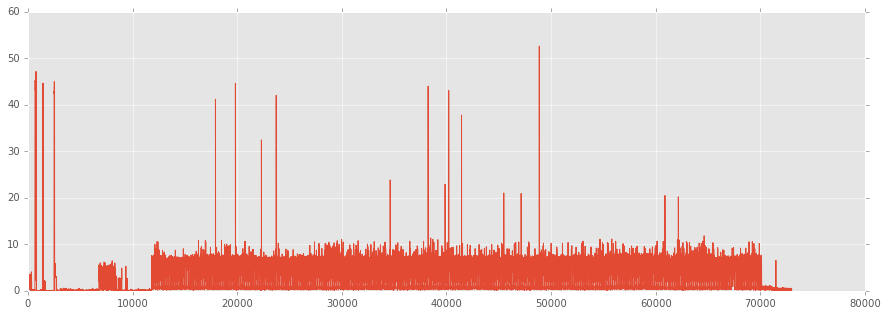

In [129]:
plt.figure(figsize=(15,5))
plt.plot(df['current'])

In [130]:
# converting time date column to correct pandas format, we call this auxiliary variable dateframe
dateframe = pd.to_datetime(df['date'])
dateframe.head()

0   2017-03-31 18:30:07
1   2017-03-31 18:30:07
2   2017-03-31 18:30:07
3   2017-03-31 18:30:07
4   2017-03-31 18:30:07
Name: date, dtype: datetime64[ns]

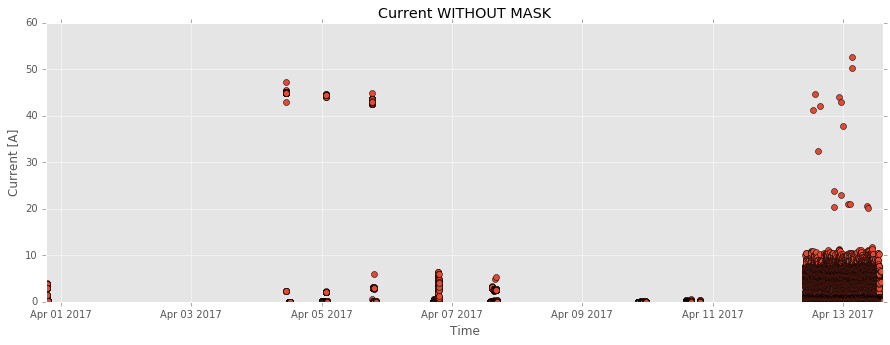

In [170]:
# WE test this aux variable in the currents plot
plt.figure(figsize=(15,5))
plt.plot_date(x=dateframe, y =df['current'])
plt.axes().set(xlabel='Time', ylabel='Current [A]',title='Current WITHOUT MASK');

In [132]:
# Giving the dataframe value to df['date] time , so the 'date' from our principal
# dataframe is correc to be ploted
df['date'] = dateframe

# MASK
Modify this for change the time sample

In [152]:
# Crearing a mask to filter data in the by the time that we want to analize
# Change 'the mask time value' for select other time stamp, e.g : 2017-04-13 09:30:07

mask = df['date'] > pd.to_datetime('2017-04-13 06:30:07')


In [154]:
# Creating a df_later variable dataframe to put our currents of interest, this will be ploted.

df_later = df[mask][["date", "current"]]
df_later.head()

,date,current
55542,2017-04-13 06:30:38,6.55
55543,2017-04-13 06:30:38,6.03
55544,2017-04-13 06:30:38,5.97
55545,2017-04-13 06:30:38,6.02
55546,2017-04-13 06:30:38,5.16


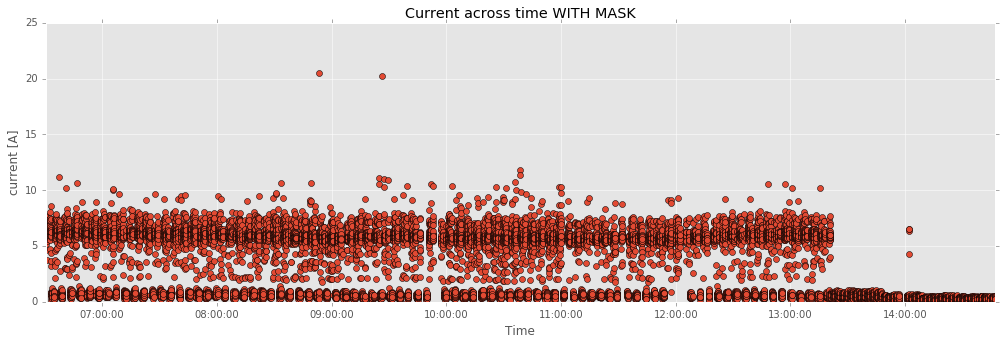

In [169]:
plt.figure(figsize=(17,5))

plt.plot_date(x=df_later['date'], y =df_later['current'])
plt.axes().set(xlabel='Time', ylabel='current [A]',title='Current across time WITH MASK');

In [135]:
# statistical description of the currents column
df_later.describe()

,current
count,17450.000000
mean,3.504316
std,2.775155
min,0.000000
25%,0.550000
50%,5.110000
75%,5.960000
max,20.500000


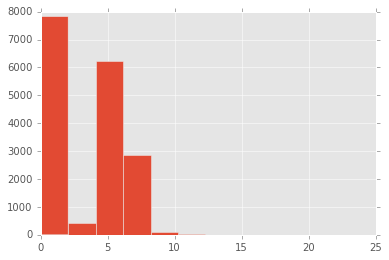

In [136]:
# histogram of the currents distribution values.
df_later['current'].hist()

# Voltaje Analysis

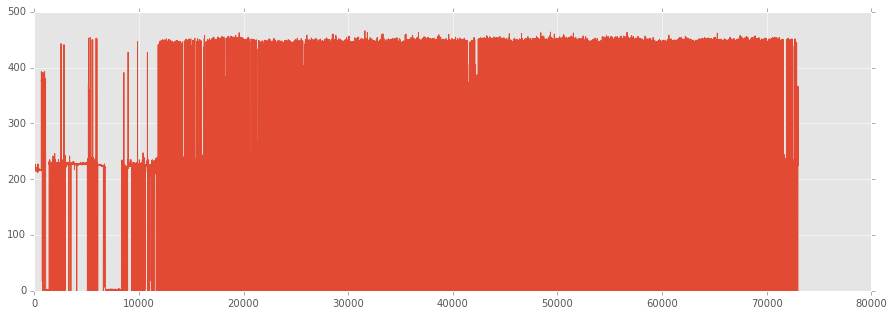

In [137]:
plt.figure(figsize=(15,5))
plt.plot(df['volt'])

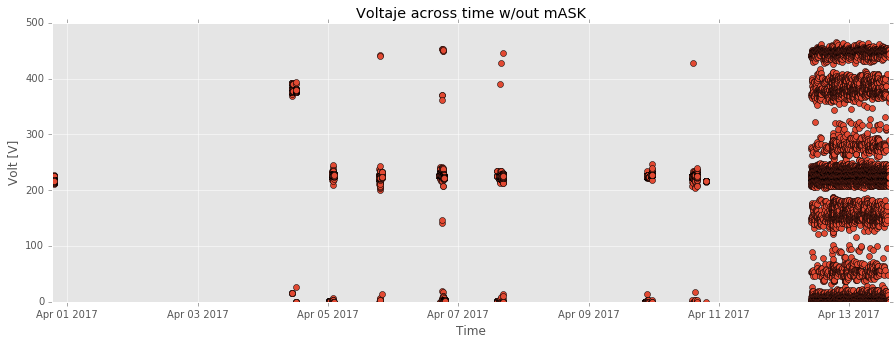

In [168]:
# WE test this aux variable in the volt plot
plt.figure(figsize=(15,5))
plt.plot_date(x=dateframe, y =df['volt'], label='Voltje ')



plt.axes().set(xlabel='Time', ylabel='Volt [V]',title='Voltaje across time w/out mASK');

In [157]:
# Creating a df_later variable dataframe to put our currents of interest, this will be ploted.

df_later_volt = df[mask][["date", "volt"]]

df_later_volt.head()

,date,volt
55542,2017-04-13 06:30:38,228.3
55543,2017-04-13 06:30:38,227.3
55544,2017-04-13 06:30:38,227.6
55545,2017-04-13 06:30:38,227.1
55546,2017-04-13 06:30:38,452.3


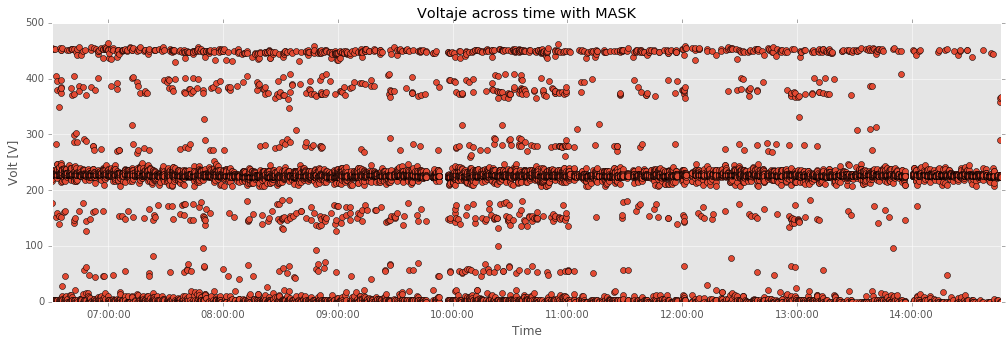

In [167]:
plt.figure(figsize=(17,5))

plt.plot_date(x=df_later_volt['date'], y =df_later_volt['volt'])
plt.axes().set(xlabel='Time', ylabel='Volt [V]',title='Voltaje across time with MASK');

In [159]:
df_later_volt.describe()

,volt
count,17450.000000
mean,207.841713
std,90.801656
min,0.000000
25%,224.500000
50%,226.000000
75%,227.900000
max,463.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef65e4da0>]], dtype=object)

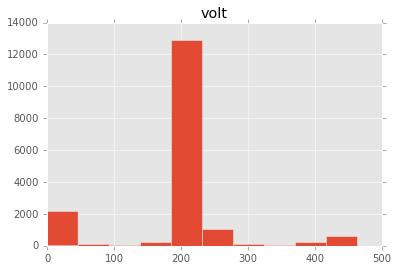

In [160]:
df_later_volt.hist()

# Cos phi analysis

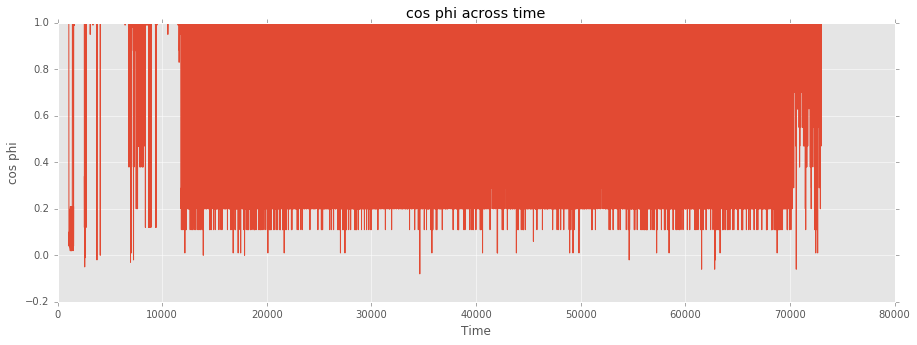

In [161]:
plt.figure(figsize=(15,5))
plt.plot(df['cos'])
plt.axes().set(xlabel='Time', ylabel='cos phi',title='cos phi across time');

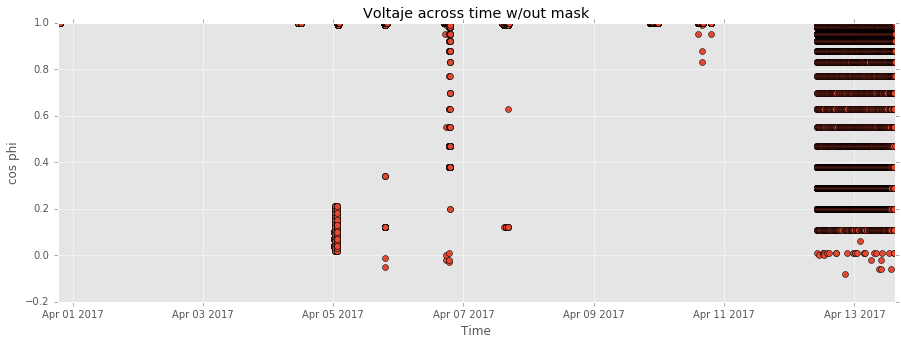

In [162]:
# WE test this aux variable in the currents plot
plt.figure(figsize=(15,5))
plt.plot_date(x=dateframe, y =df['cos'])
plt.axes().set(xlabel='Time', ylabel='cos phi',title='Voltaje across time w/out mask');

In [163]:
# Creating a df_later variable dataframe to put our currents of interest, this will be ploted.

df_later_cos = df[mask][["date", "cos"]]

df_later_cos.head()

,date,cos
55542,2017-04-13 06:30:38,1.0
55543,2017-04-13 06:30:38,1.0
55544,2017-04-13 06:30:38,1.0
55545,2017-04-13 06:30:38,1.0
55546,2017-04-13 06:30:38,1.0


### using the mask from  2017-04-13 06:30:07

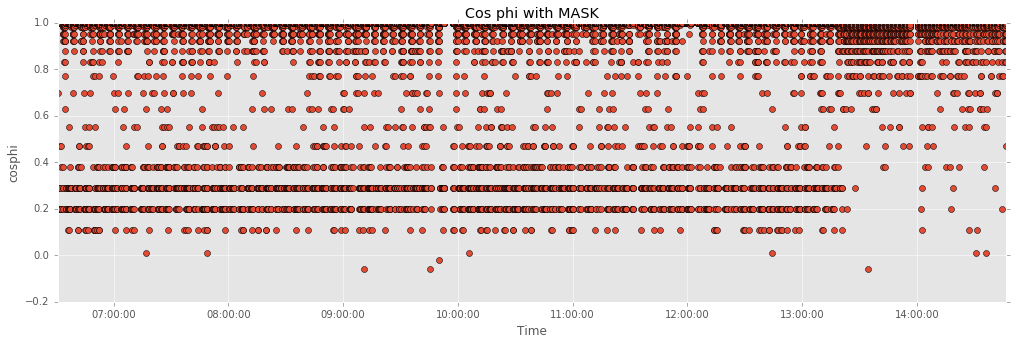

In [164]:
plt.figure(figsize=(17,5))

plt.plot_date(x=df_later_cos['date'], y =df_later_cos['cos'])
plt.axes().set(xlabel='Time', ylabel='cosphi', title='Cos phi with MASK');

In [165]:
df_later_cos.describe()

,cos
count,17450.000000
mean,0.868350
std,0.265231
min,-0.060000
25%,0.950000
50%,1.000000
75%,1.000000
max,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef686e2e8>]], dtype=object)

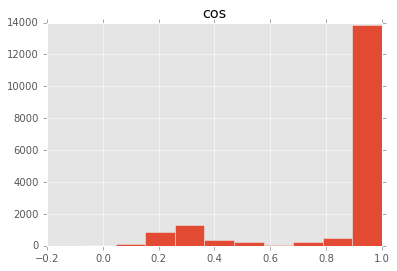

In [166]:
df_later_cos.hist()